# Notebook to showcase how to use the model

## CLEAR OUTPUT OF THE NOTEBOOK BEFORE COMMITING/PUSHING

The path may not work for you as they are hardcoded for a sample of the data on my machine

In [17]:
import torch
from torchvision.io import read_image
import torchvision.transforms as T
from cnn import CNN
from encoder import Encoder
import os
import csv

In [18]:
FOLDER_PATH = '../../data/CROHME2016_data/data_png/subset/'

In [19]:
#loading the images in one tensor
batch = torch.zeros((11,1,304,304))
tree = next(os.walk(FOLDER_PATH))
for i,file in enumerate(tree[-1]):
    if file.endswith('png'):
        pic = read_image(f"{FOLDER_PATH}/{file}").to(torch.float32)
        batch[i] += pic

In [20]:
#load the labels in a dictionary
labels = dict()
with open(f"{FOLDER_PATH}iso_GT.txt") as f:
    reader = csv.reader(f)
    for row in reader:
        labels[row[0]] = row[1]

In [24]:
net = CNN()
encoder = Encoder(512, 256, 27*24, 11)
out = net(batch)
o, h = encoder(out)

In [25]:
img = o.reshape((27,24, 11))[:,:,0]

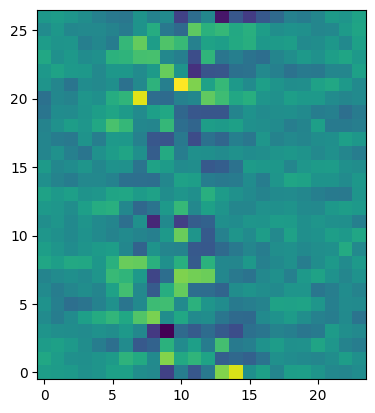

In [26]:
import matplotlib.pyplot as plt
#example of the feature grid F' for the first image
plt.imshow(img.detach().numpy(), origin='lower')